In [ ]:
# Versão da Linguagem Python
from platform import python_version
print('Versão de Python Neste Jupyter Notebook:', python_version())

# usaremos o filtro 'warning' para deixar mais limpo.
import warnings
warnings.filterwarnings('ignore')

### One-Dimensional Data Example

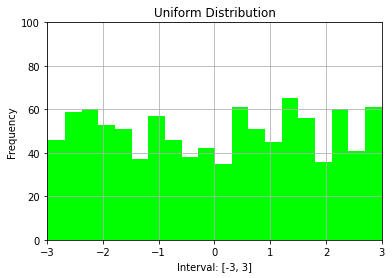

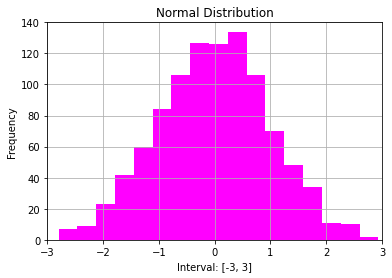

In [1]:
import matplotlib.pyplot as plt
import numpy as np

if __name__ == "__main__": 
    plt.figure('Uniform Distribution')  
    uniform = np.random.uniform(-3, 3, 1000)  
    count, bins, ignored = plt.hist(uniform, 20, facecolor='lime')
    
    plt.xlabel('Interval: [-3, 3]') 
    plt.ylabel('Frequency')  
    plt.title('Uniform Distribution')
    plt.axis([-3,3,0,100]) 
    plt.grid(True)    
    plt.figure('Normal Distribution')  
    
    normal = np.random.normal(0, 1, 1000)
    count, bins, ignored = plt.hist(normal, 20,facecolor='fuchsia') 
    
    plt.xlabel('Interval: [-3, 3]')    
    plt.ylabel('Frequency')  
    plt.title('Normal Distribution')   
    plt.axis([-3,3,0,140])  
    plt.grid(True)  
    plt.show()

### Two-Dimensional Data Example

0.8925232981441724
-0.8874801837531907


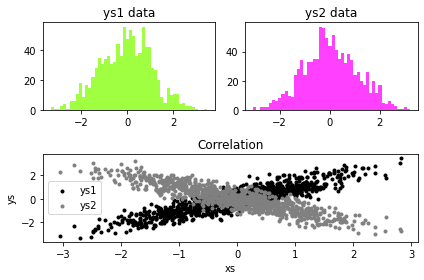

In [3]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np, random
from scipy.special import ndtri

def inverse_normal_cdf(r): 
    return ndtri(r)

def random_normal():
    return inverse_normal_cdf(random.random())

def scatter(loc):  
    plt.scatter(xs, ys1, marker='.', color='black', label='ys1') 
    plt.scatter(xs, ys2, marker='.', color='gray',  label='ys2')  
    plt.xlabel('xs')   
    plt.ylabel('ys')   
    plt.legend(loc=loc) 
    plt.tight_layout()

if __name__ == "__main__":   
    xs = [random_normal() for _ in range(1000)] 
    ys1 = [ x + random_normal() / 2 for x in xs] 
    ys2 = [-x + random_normal() / 2 for x in xs] 
    gs = gridspec.GridSpec(2, 2) 
    fig = plt.figure() 
       
    ax1 = fig.add_subplot(gs[0,0])  
    plt.title('ys1 data')  
    n, bins, ignored = plt.hist(ys1, 50, facecolor='chartreuse', alpha=0.75)
    
    ax2 = fig.add_subplot(gs[0,1])
    plt.title('ys2 data')
    n, bins, ignored = plt.hist(ys2, 50, facecolor='fuchsia', alpha=0.75)   
    
    ax3 = fig.add_subplot(gs[1,:]) 
    plt.title('Correlation')    
    scatter(6)   
    print (np.corrcoef(xs, ys1)[0, 1])  
    print (np.corrcoef(xs, ys2)[0, 1]) 
    plt.show()

### Data Correlation and Basic Statistics

highly positive:
 [[1.         0.82777267]
 [0.82777267 1.        ]]

highly negative:
 [[ 1.        -0.8350955]
 [-0.8350955  1.       ]]

no/weak:
 [[1.         0.00962676]
 [0.00962676 1.        ]]


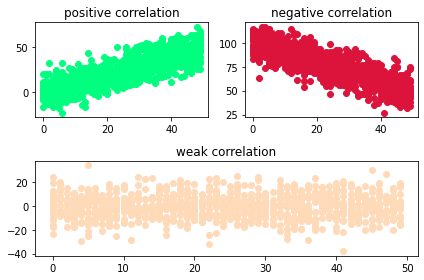

In [4]:
import random, numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

if __name__ == "__main__":
    np.random.seed(0)
    x = np.random.randint(0, 50, 1000) 
    y = x + np.random.normal(0, 10, 1000)
    print ('highly positive:\n', np.corrcoef(x, y)) 
    gs = gridspec.GridSpec(2, 2)  
    fig = plt.figure()  
    
    ax1 = fig.add_subplot(gs[0,0])  
    plt.title('positive correlation')   
    plt.scatter(x, y, color='springgreen')
    y = 100 - x + np.random.normal(0, 10, 1000)   
    print ('\nhighly negative:\n', np.corrcoef(x, y))
    
    ax2 = fig.add_subplot(gs[0,1]) 
    plt.title('negative correlation') 
    plt.scatter(x, y, color='crimson')
    y = np.random.normal(0, 10, 1000)    
    print ('\nno/weak:\n', np.corrcoef(x, y))  
    
    ax3 = fig.add_subplot(gs[1,:])  
    plt.title('weak correlation')
    plt.scatter(x, y, color='peachpuff')
    plt.tight_layout() 
    plt.show()

### Pandas Correlation and Heat Map Example

### Various Visualization Examples

### Cleaning a CSV File with Pandas and JSON

### Slicing and Dicing

### Data Cubes

### Data Scaling and Wrangling

In [ ]:
%reload_ext watermark
%watermark -a "Caique Miranda" -gu "caiquemiranda" -iv

### End.